In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import plotly.express as px

In [2]:
# Load the dataset
file_path = '6.3.3_spotify_5000_songs.csv'  # Replace with your file path
spotify_data = pd.read_csv(file_path)
spotify_data.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [3]:
# Clean the column names
spotify_data.columns = spotify_data.columns.str.strip()
spotify_data.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'id', 'html'],
      dtype='object')

In [4]:
# Select relevant audio features for clustering
features = [
    'danceability', 'energy', 'loudness', 'mode', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'
]

audio_features = spotify_data[features]

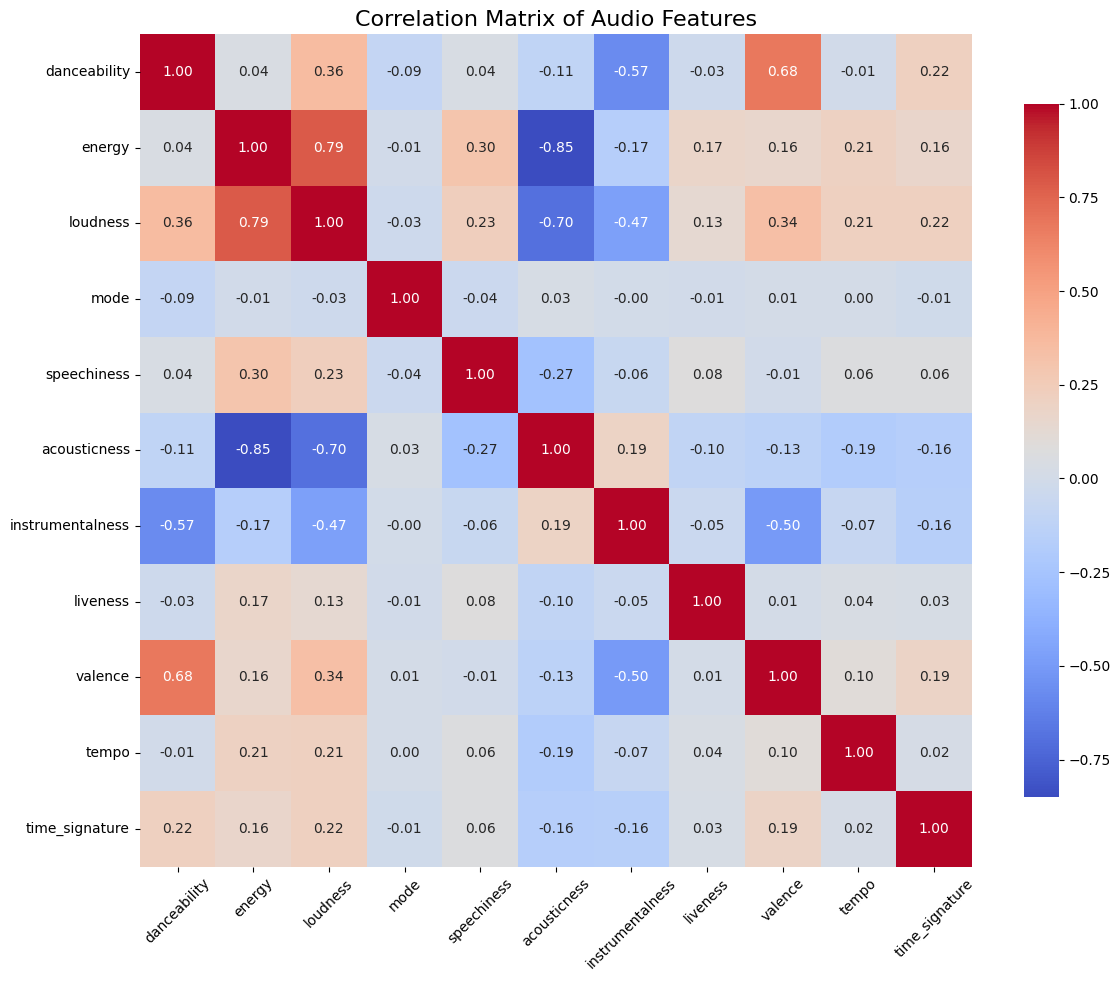

In [5]:
# Check for correlation among features
correlation_matrix = audio_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8}, square=True)
plt.title("Correlation Matrix of Audio Features", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [6]:
# Select relevant audio features for clustering
features = [
    'energy', 'mode', 'speechiness', 
    'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'
]

audio_features = spotify_data[features]

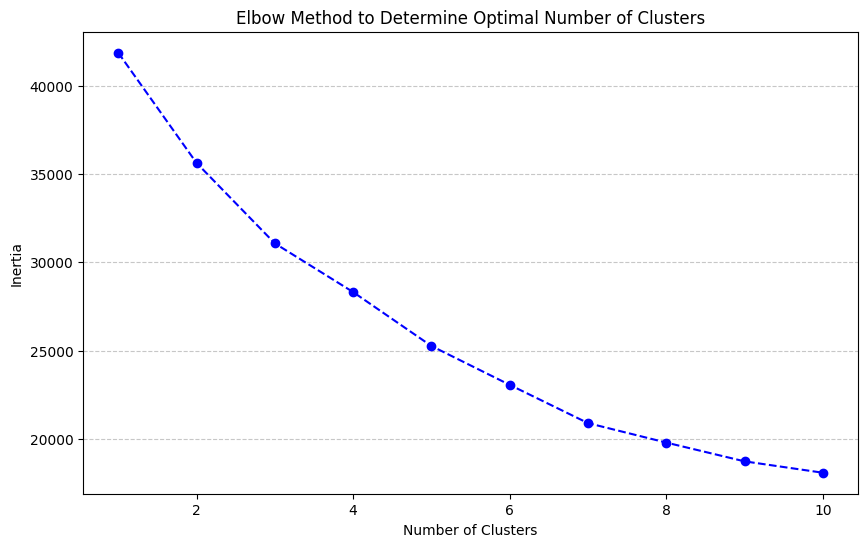

In [7]:
# Standardize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(audio_features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

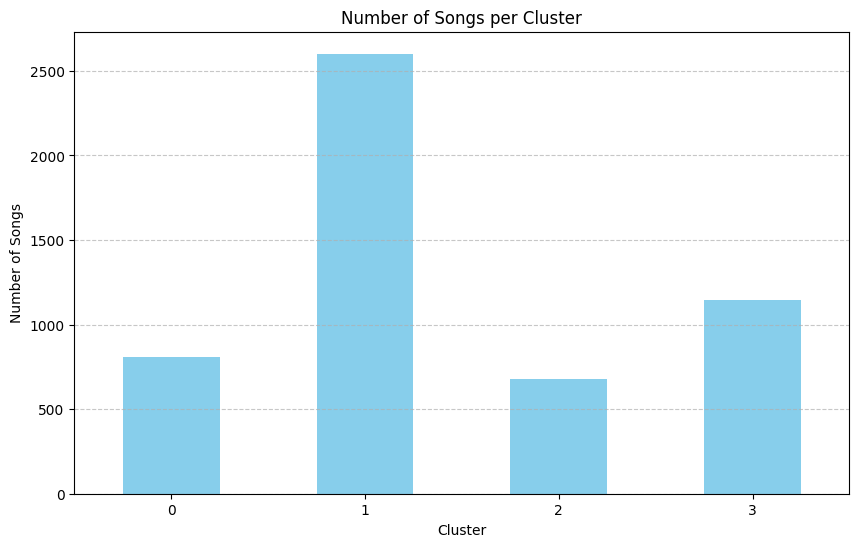

In [16]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(normalized_features)

# Add the cluster labels to the original data
spotify_data['cluster'] = clusters

# Visualization: Number of songs per cluster
plt.figure(figsize=(10, 6))
spotify_data['cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Songs per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

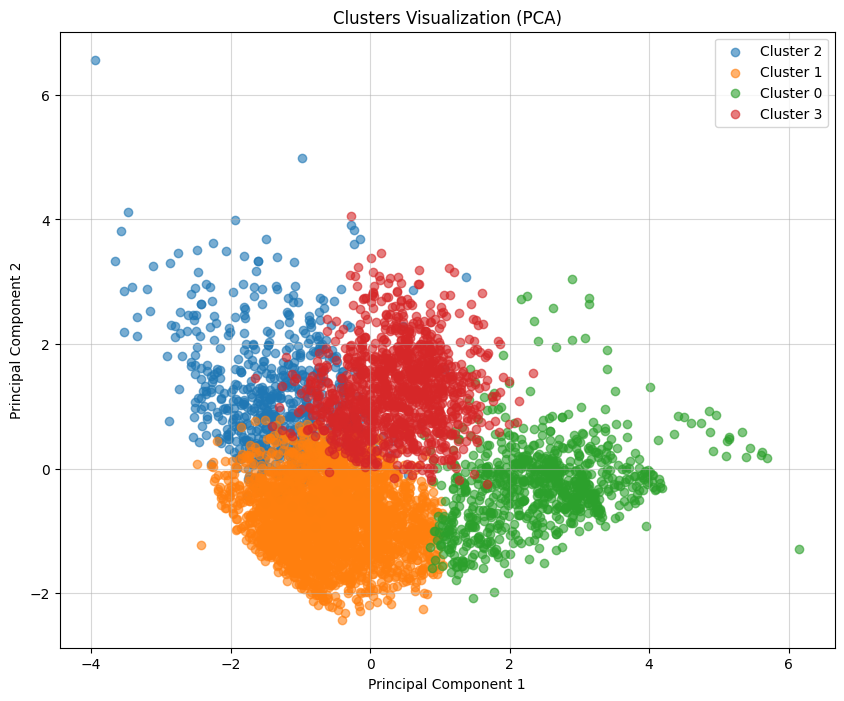

In [9]:
# Converting data using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(normalized_features)

# Adding PCA to DataFrame
spotify_data['PC1'] = pca_features[:, 0]
spotify_data['PC2'] = pca_features[:, 1]

# Visualization: Clusters in 2D space
plt.figure(figsize=(10, 8))
for cluster in spotify_data['cluster'].unique():
    cluster_data = spotify_data[spotify_data['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [10]:
silhouette_avg = silhouette_score(normalized_features, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.20063930501426572


In [18]:
import plotly.express as px

# Ensure PCA transformation to 3 components is done
pca_3d = PCA(n_components=3)
pca_features_3d = pca_3d.fit_transform(normalized_features)

# Add components to DataFrame
spotify_data['PC1'] = pca_features_3d[:, 0]
spotify_data['PC2'] = pca_features_3d[:, 1]
spotify_data['PC3'] = pca_features_3d[:, 2]

# Create a DataFrame with PCA components and cluster labels
plot_data = spotify_data[['PC1', 'PC2', 'PC3', 'cluster']]

# Plot interactive 3D scatter plot
fig = px.scatter_3d(
    plot_data,
    x='PC1',
    y='PC2',
    z='PC3',
    color='cluster',
    title='3D Clusters Visualization (PCA)',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
    width=1000,  # Specify the width of the plot
    height=700   # Specify the height of the plot
)

# Show the plot
fig.show()

In [19]:
print(f"Explained Variance Ratio: {pca_3d.explained_variance_ratio_}")

Explained Variance Ratio: [0.22928435 0.15973773 0.12632926]


In [20]:
# Analyze the cluster centers to assign meaningful playlist names
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)

# Display basic insights
print("Cluster Centers:")
display(cluster_centers)

Cluster Centers:


,energy,mode,speechiness,instrumentalness,liveness,valence,tempo,time_signature
0,0.165583,0.638166,0.046041,0.660629,0.136023,0.174429,104.214040,3.537794
1,0.664139,0.657955,0.056048,0.032054,0.153062,0.604745,120.719138,3.991161
2,0.764201,0.536873,0.201105,0.041485,0.355178,0.515124,121.671858,3.992625
3,0.907288,0.689895,0.101130,0.611932,0.192923,0.225316,122.649058,3.906794


In [22]:
# Assign playlist names based on characteristics
playlist_names = {
    0: "Relaxing Instrumentals",
    1: "Energetic Party Hits",
    2: "Rhythmic Beats",
    3: "High-Energy Experimentals"
}

# Map playlist names to clusters
spotify_data['playlist'] = spotify_data['cluster'].map(playlist_names)
print(spotify_data[['cluster', 'playlist']].drop_duplicates())

     cluster                   playlist
0          2             Rhythmic Beats
1          1       Energetic Party Hits
16         0     Relaxing Instrumentals
149        3  High-Energy Experimentals


In [23]:
# Save the clustered data to a new CSV
output_path = 'clustered_spotify_playlists.csv'  # Replace with your desired output path
spotify_data.to_csv(output_path, index=False)